<h6 style='text-align:center;font-size:40px;background-color:SALMON;border:20px;color:white'>DIABETIC PATIENT'S RE-ADMISSION PREDICTION<h6>

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>CONTENTS<h2>

1. Import Relevant Libraries
2. Data Inspection
3. Data Cleaning
4. Exploratory Data Analysis
5. Feature Engineering 
6. Building Model

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:50px;color:white'>PROBLEM STATEMENT<h2>

## This Project aims to identify the factors that lead to the high readmission rate of diabetic patients within 30 days post discharge and correspondingly to predict the high-risk diabetic-patients who are most likely to get readmitted within 30 days so that the quality of care can be improved along with improved patient’s experience, health of the population and reduce costs by lowering readmission rates. Also, to identify the medicines that are the most effective in treating diabetes

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>DATA<h2>

* **Encounter ID**	Unique identifier of an encounter
* **Patient number**	Unique identifier of a patient
* **Race**	Values: Caucasian, Asian, African American, Hispanic, and other
* **Gender**	Values: male, female, and unknown/invalid
* **Age**	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**	Weight in pounds
* **Admission type**	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**	Integer number of days between admission and discharge
* **Payer code**	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**	Number of lab tests performed during the encounter
* **Number of procedures** Numeric	Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**	Number of distinct generic names administered during the encounter
* **Number of outpatient visits** Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**	Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**	Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses**	Number of diagnoses entered to the system 0%
* **Glucose serum test result**	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result**	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications**	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications**	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications	For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted**	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission


<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 1: Importing the Relevant Libraries <h2>

In [745]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [746]:
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 2. Data Inspection<h2>

In [747]:

df = pd.read_csv('diabetic_data.csv')

In [748]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [749]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [858]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

## Check unique values in dataset

In [859]:
df.nunique()

encounter_id                98052
patient_nbr                 68629
race                            5
gender                          2
age                            10
admission_type_id               8
discharge_disposition_id       26
admission_source_id            17
time_in_hospital               14
num_lab_procedures            118
num_procedures                  7
num_medications                75
number_outpatient              39
number_emergency               33
number_inpatient               20
diag_1                        713
diag_2                        740
diag_3                        786
number_diagnoses               14
max_glu_serum                   4
A1Cresult                       4
metformin                       4
repaglinide                     4
nateglinide                     4
chlorpropamide                  4
glimepiride                     4
acetohexamide                   2
glipizide                       4
glyburide                       4
tolbutamide   

## Check for categorical attributes

In [860]:
df.dtypes

encounter_id                int64
patient_nbr                 int64
race                        int64
gender                      int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
diag_1                      int64
diag_2                      int64
diag_3                      int64
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
acetohexamide               int64
glipizide                   int64
glyburide                   int64
tolbutamide   

In [750]:
data = [df]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (df[col].value_counts())


Frequency of Categories for variable race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

Frequency of Categories for variable gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

Frequency of Categories for variable age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

Frequency of Categories for variable weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

Frequency of Categories for variable payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP    

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 3. Data Cleaning <h2>

###  From the above dataset,  we can see that "Weight, payer_code and medical_specialty" have a lot of missing values thus it is best to remove these values from the dataset.


In [751]:
df= df.drop(['weight','payer_code','medical_specialty'],axis=1)


## Let's investigate the readmitted column

In [753]:
df['readmitted']

0          NO
1         >30
2          NO
3          NO
4          NO
         ... 
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

## We can see that there are 3 types of values:- 'NO','<30','>30'. we can make it a categorical variable so that different   Machine Learning techniques can apply.


In [754]:
df['readmitted']=df['readmitted'].replace('>30',0)
df['readmitted']=df['readmitted'].replace('<30',1)
df['readmitted']=df['readmitted'].replace('NO',0)



In [755]:
df.groupby('readmitted').size()

readmitted
0    90409
1    11357
dtype: int64

In [756]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [757]:
# Replace "?" with NaN in the specified columns
df.replace("?", pd.NA, inplace=True)

# Drop rows with missing values in the specified columns
df.dropna(subset=["diag_1", "diag_2", "diag_3", "race"], inplace=True)

# Reset the index of the DataFrame if needed
df.reset_index(drop=True, inplace=True)

In [758]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0


In [759]:
# Drop rows with "Unknown/Invalid" in the gender column
df = df[df['gender'] != 'Unknown/Invalid']

# Reset the index of the DataFrame if needed
df.reset_index(drop=True, inplace=True)

In [760]:
data = [df]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    #Print frequency of categories
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (df[col].value_counts())


Frequency of Categories for variable race
Caucasian          75079
AfricanAmerican    18881
Hispanic            1984
Other               1483
Asian                625
Name: race, dtype: int64

Frequency of Categories for variable gender
Female    52833
Male      45219
Name: gender, dtype: int64

Frequency of Categories for variable age
[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: age, dtype: int64

Frequency of Categories for variable diag_1
428    6730
414    6373
786    3900
410    3514
486    3412
       ... 
216       1
V43       1
838       1
955       1
V51       1
Name: diag_1, Length: 713, dtype: int64

Frequency of Categories for variable diag_2
428    6517
276    6513
250    5412
427    4919
401    3613
       ... 
316       1
963       1
506       1
944       1
927       1
Name: diag_2, Length: 740, dtype: int64

Frequency of Categorie

In [761]:
df.shape

(98052, 47)

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 4. Exploratory Data Analysis <h2>

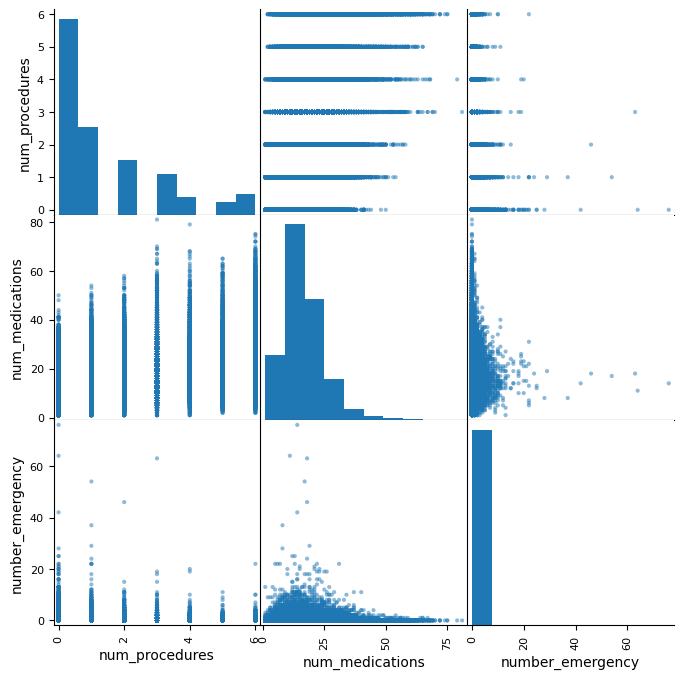

In [762]:
# Let's see the relationship between different variables to understand the data and if there is a strong correlation between two variables.
sm = pd.plotting.scatter_matrix(df[['num_procedures', 'num_medications', 'number_emergency']], figsize = (8, 8))
sns.despine()

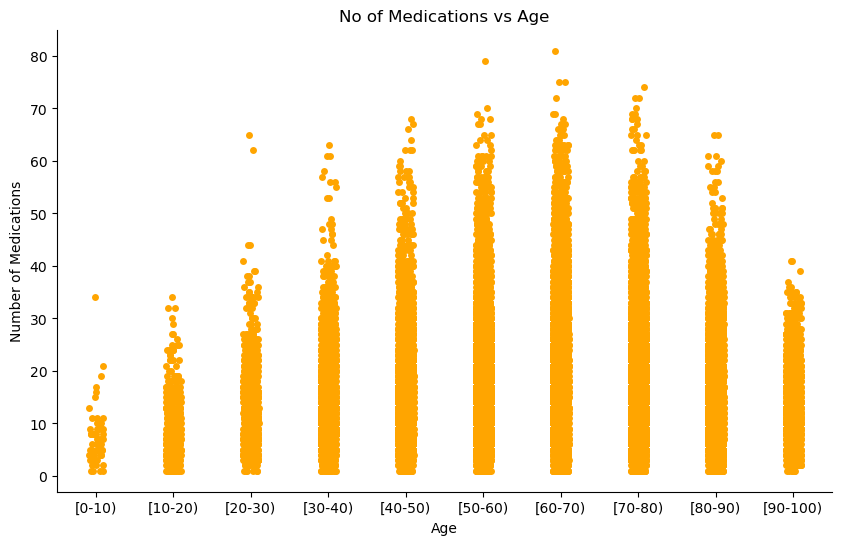

In [763]:
#Let's try to see how the age and number of medicines varies,
sortage = df.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'orange')
sns.despine()
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('No of Medications vs Age')
plt.show()

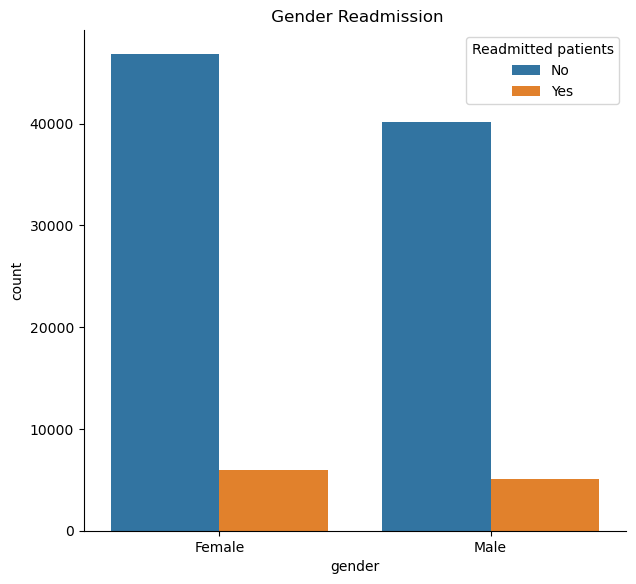

In [764]:
#Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = 'readmitted', data = df) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title(' Gender Readmission')
plt.show()

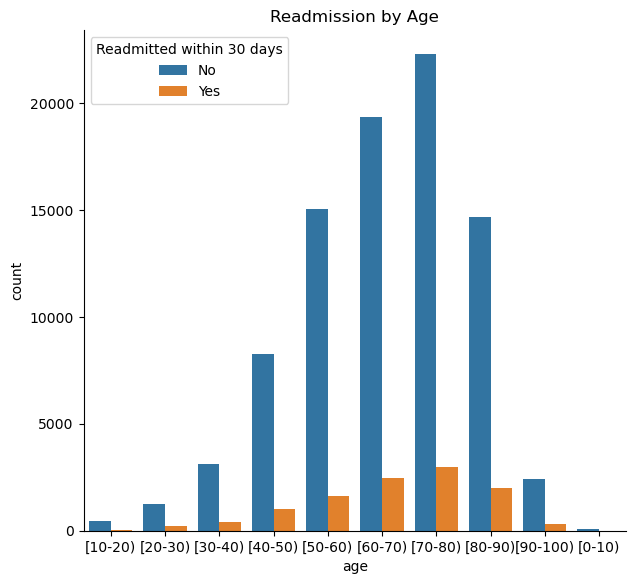

In [765]:
#Relation between age and readmission,
ageplt = sns.countplot(x = 'age', hue = 'readmitted', data = df) 

sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmission by Age')
plt.show()

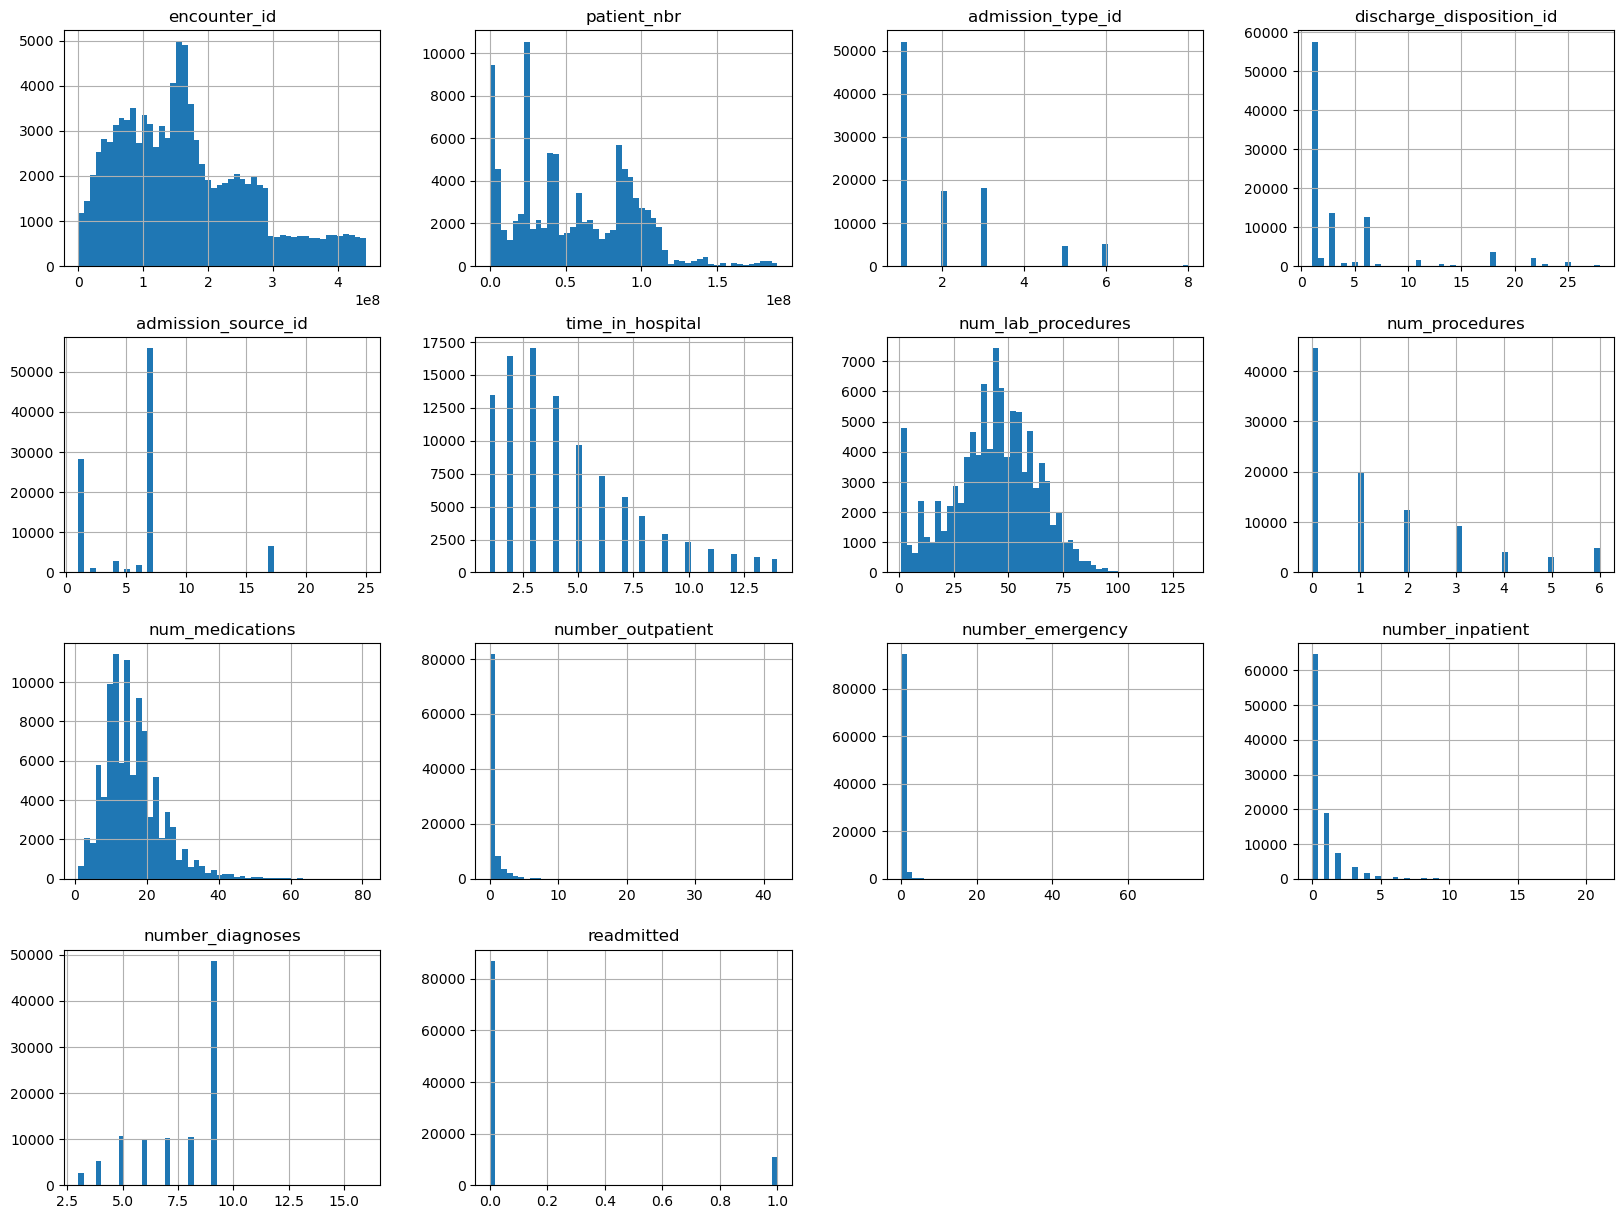

In [766]:
#Plotting the numerical variables in the dataset,
df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='age', ylabel='count'>

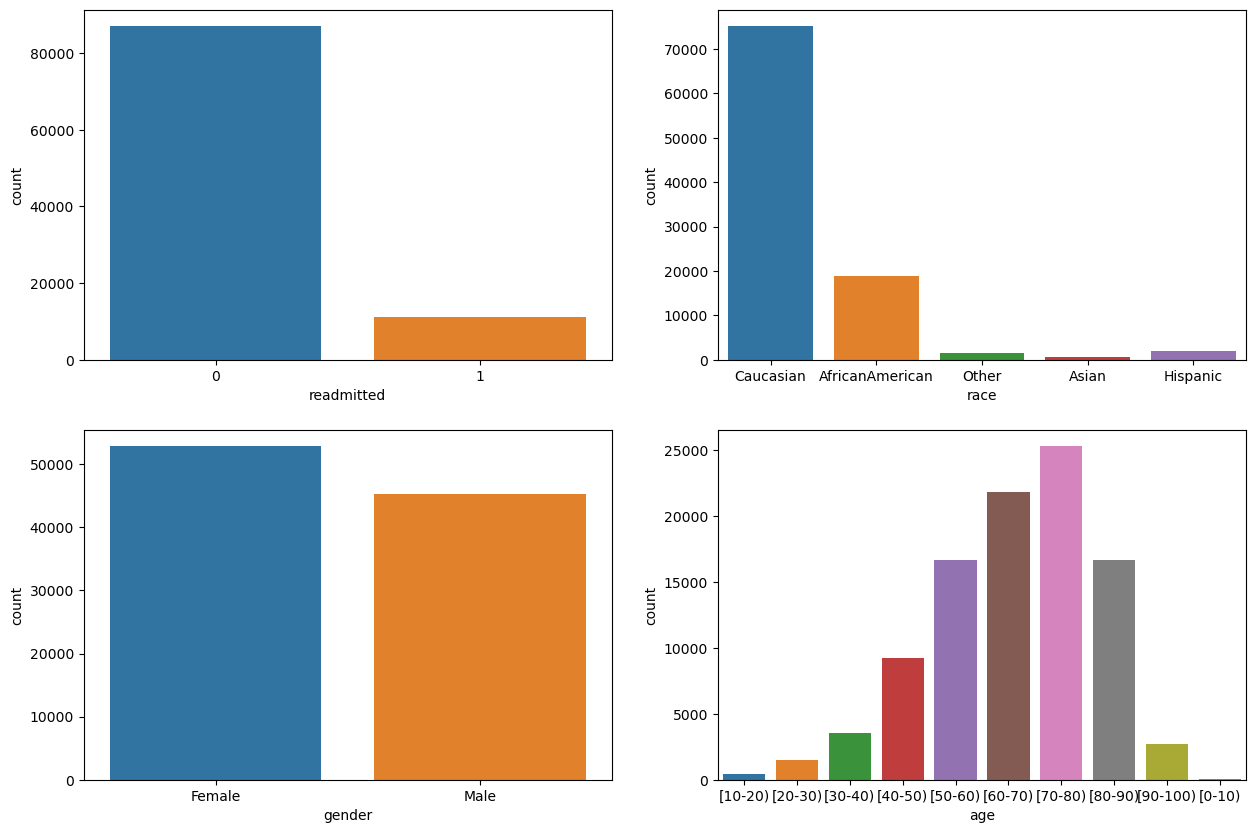

In [767]:
#Exploring the categorical variables,
fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)

sns.countplot(x="readmitted", data=df, ax=ax[0][0])
sns.countplot(x="race", data=df, ax=ax[0][1])
sns.countplot(x="gender", data=df, ax=ax[1][0])
sns.countplot(x="age", data=df, ax=ax[1][1])


In [768]:
df['race']

0              Caucasian
1        AfricanAmerican
2              Caucasian
3              Caucasian
4              Caucasian
              ...       
98047    AfricanAmerican
98048    AfricanAmerican
98049          Caucasian
98050          Caucasian
98051          Caucasian
Name: race, Length: 98052, dtype: object

<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 5. Feature Engineering<h2>

df['race']=df['race'].replace('AfricanAmerican',0)
df['race']=df['race'].replace('Caucasian',1)
df['race']=df['race'].replace('Asian',2)
df['race']=df['race'].replace('Hispanic',3)
df['race']=df['race'].replace('Other',4)


In [827]:
df['insulin']=df['insulin'].replace('No',0)
df['insulin']=df['insulin'].replace('Steady',1)
df['insulin']=df['insulin'].replace('Down',2)
df['insulin']=df['insulin'].replace('Up',3)


In [828]:
df['metformin-rosiglitazone']=df['metformin-rosiglitazone'].replace('No',0)

In [829]:
df['citoglipton']=df['citoglipton'].replace('No',0)

In [830]:
df['examide']=df['examide'].replace('No',0)

In [831]:
df['diabetesMed']=df['diabetesMed'].replace('No',0)
df['diabetesMed']=df['diabetesMed'].replace('Yes',1)

In [832]:
df['change']=df['change'].replace('No',0)
df['change']=df['change'].replace('Ch',1)

In [833]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [834]:
df['age']= le.fit_transform(df['age'])
df['gender']= le.fit_transform(df['gender'])
df['diag_1']= le.fit_transform(df['diag_1'])
df['diag_2']= le.fit_transform(df['diag_2'])
df['diag_3']= le.fit_transform(df['diag_3'])
df['max_glu_serum']= le.fit_transform(df['max_glu_serum'])
df['A1Cresult']= le.fit_transform(df['A1Cresult'])
df['metformin']= le.fit_transform(df['metformin'])
df['repaglinide']= le.fit_transform(df['repaglinide'])
df['nateglinide']= le.fit_transform(df['nateglinide'])
df['chlorpropamide']= le.fit_transform(df['chlorpropamide'])
df['glimepiride']= le.fit_transform(df['glimepiride'])
df['acetohexamide']= le.fit_transform(df['acetohexamide'])
df['glipizide']= le.fit_transform(df['glipizide'])
df['glyburide']= le.fit_transform(df['glyburide'])
df['tolbutamide']= le.fit_transform(df['tolbutamide'])
df['pioglitazone']= le.fit_transform(df['pioglitazone'])
df['rosiglitazone']= le.fit_transform(df['rosiglitazone'])
df['acarbose']= le.fit_transform(df['acarbose'])
df['miglitol']= le.fit_transform(df['miglitol'])
df['troglitazone']= le.fit_transform(df['troglitazone'])
df['tolazamide']= le.fit_transform(df['tolazamide'])
df['glyburide-metformin']= le.fit_transform(df['glyburide-metformin'])
df['glipizide-metformin']= le.fit_transform(df['glipizide-metformin'])
df['metformin-pioglitazone']= le.fit_transform(df['metformin-pioglitazone'])
df['glimepiride-pioglitazone']= le.fit_transform(df['glimepiride-pioglitazone'])
df['insulin']= le.fit_transform(df['insulin'])
df['change']= le.fit_transform(df['change'])

In [835]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,1,0,1,1,1,7,3,59,...,0,3,1,0,0,0,0,1,1,0
1,64410,86047875,0,0,2,1,1,7,2,11,...,0,0,1,0,0,0,0,0,1,0
2,500364,82442376,1,1,3,1,1,7,2,44,...,0,3,1,0,0,0,0,1,1,0
3,16680,42519267,1,1,4,1,1,7,1,51,...,0,1,1,0,0,0,0,1,1,0
4,35754,82637451,1,1,5,2,1,2,3,31,...,0,1,1,0,0,0,0,0,1,0


In [836]:
# Cleaning the data, replacing the null values in numeric data by 0 and object data by unknown,

numcolumn = df.select_dtypes(include = [np.number]).columns
objcolumn = df.select_dtypes(include = ['object']).columns

In [837]:
# Substituting 0 and unknown,

df[numcolumn] = df[numcolumn].fillna(0)
df[objcolumn] = df[objcolumn].fillna("unknown")


In [838]:
#Encoding the data,

def map_now():
    listname = [('infections', 139),
                ('neoplasms', (239 - 139)),
                ('endocrine', (279 - 239)),
                ('blood', (289 - 279)),
                ('mental', (319 - 289)),
                ('nervous', (359 - 319)),
                ('sense', (389 - 359)),
                ('circulatory', (459-389)),
                ('respiratory', (519-459)),
                ('digestive', (579 - 519)),
                ('genitourinary', (629 - 579)),
                ('pregnancy', (679 - 629)),
                ('skin', (709 - 679)),
                ('musculoskeletal', (739 - 709)),
                ('congenital', (759 - 739)),
                ('perinatal', (779 - 759)),
                ('ill-defined', (799 - 779)),
                ('injury', (999 - 799))]
    
    
    dictcout = {}
    count = 1
    for name, num in listname:
        for i in range(num):
            dictcout.update({str(count): name})  
            count += 1
    return dictcout
  

def codemap(df, codes):
    import pandas as pd
    namecol = df.columns.tolist()
    for col in namecol:
        temp = [] 
        for num in df[col]:           
            if ((num is None) | (num in ['unknown', '?']) | (pd.isnull(num))): temp.append('unknown')
            elif(num.upper()[0] == 'V'): temp.append('supplemental')
            elif(num.upper()[0] == 'E'): temp.append('injury')
            else: 
                lkup = num.split('.')[0]
                temp.append(codes[lkup])           
        df.loc[:, col] = temp               
    return df 



In [839]:
#Now let's look at the dataset again and drop the irrelevant columns,

df.describe

<bound method NDFrame.describe of        encounter_id  patient_nbr  race  gender  age  admission_type_id  \
0            149190     55629189     1       0    1                  1   
1             64410     86047875     0       0    2                  1   
2            500364     82442376     1       1    3                  1   
3             16680     42519267     1       1    4                  1   
4             35754     82637451     1       1    5                  2   
...             ...          ...   ...     ...  ...                ...   
98047     443847548    100162476     0       1    7                  1   
98048     443847782     74694222     0       0    8                  1   
98049     443854148     41088789     1       1    7                  1   
98050     443857166     31693671     1       0    8                  2   
98051     443867222    175429310     1       1    7                  1   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
0  

In [840]:
data1 = df.drop(['encounter_id', "patient_nbr", 'admission_type_id'], axis =1) 


In [841]:
data1.head(2)

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,0,1,1,7,3,59,0,18,0,...,0,3,1,0,0,0,0,1,1,0
1,0,0,2,1,7,2,11,5,13,2,...,0,0,1,0,0,0,0,0,1,0


In [781]:
data1.head(2)

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,0,1,1,7,3,59,0,18,0,...,No,3,1,0,0,No,0,1,Yes,0
1,0,0,2,1,7,2,11,5,13,2,...,No,0,1,0,0,No,0,0,Yes,0


In [741]:
from AutoClean import AutoClean

In [ ]:
pipeline = AutoClean(df)

In [ ]:
pipeline.output.head()

In [ ]:
import dtale

In [ ]:
dtale.show(df)

In [519]:

pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [587]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title = 'pandas profiling report')

In [ ]:
profile

## Spilitting and Data Normilzation

In [817]:
#Normalization of the data,

listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

from sklearn.preprocessing import StandardScaler

normal = StandardScaler()

data1[listnormal] = normal.fit_transform(data1[listnormal])

data1.describe()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmitted
count,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,9.805200e+04,9.805200e+04,9.805200e+04,9.805200e+04,9.805200e+04,...,98052.0,98052.0,98052.000000,98052.000000,98052.000000,98052.000000,98052.0,98052.000000,98052.000000,98052.000000
mean,0.899655,0.461174,6.126025,3.753396,5.776741,9.275636e-18,-1.820344e-16,1.101482e-17,1.159455e-16,-5.565382e-17,...,0.0,0.0,0.874546,1.006823,0.000133,0.000010,0.0,0.000010,0.461775,0.112858
std,0.637125,0.498493,1.559081,5.309412,4.071632,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,0.0,0.0,1.009070,0.083427,0.011514,0.003194,0.0,0.003194,0.498539,0.316421
min,0.000000,0.000000,0.000000,1.000000,1.000000,-1.143317e+00,-2.138251e+00,-7.905991e-01,-1.864670e+00,-2.932788e-01,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.000000,0.000000,5.000000,1.000000,1.000000,-8.092104e-01,-6.163085e-01,-7.905991e-01,-6.313891e-01,-2.932788e-01,...,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.000000,0.000000,6.000000,1.000000,7.000000,-1.409967e-01,4.319972e-02,-2.052788e-01,-1.380768e-01,-2.932788e-01,...,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.000000,1.000000,7.000000,4.000000,7.000000,5.272170e-01,7.027080e-01,3.800416e-01,4.785635e-01,-2.932788e-01,...,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
max,4.000000,1.000000,9.000000,28.000000,25.000000,3.200072e+00,4.507563e+00,2.721323e+00,8.001576e+00,3.243334e+01,...,0.0,0.0,3.000000,3.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [783]:
#Let's store readmitted in y and rest of the columns in X,

Y = data1['readmitted']
X = data1.drop(['readmitted'], axis =1)
X = pd.get_dummies(X)

In [784]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .2, 
                                                random_state = 7, stratify = Y)

In [785]:
print("shape of Xtrain,Xtest:",Xtrain.shape,Xtest.shape)

shape of Xtrain,Xtest: (78441, 44) (19611, 44)


<h2 style='text-align:center;font-size:30px;background-color:SALMON;border:20px;color:white'>Step 6. Building Model<h2>

## Logistic Regression

In [786]:
# create model logistic as logistic regression using Sklearn 
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
logisticreg.fit(Xtrain, Ytrain)
Ylog = logisticreg.predict(Xtest)

In [787]:
# Checking the accuracy of the model 
print(" The accuracy of the Logistic regression model:" ,logisticreg.score(Xtest, Ytest))

 The accuracy of the Logistic regression model: 0.8873591351792361


In [788]:
# checking the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Ylog))

[[17372    26]
 [ 2183    30]]


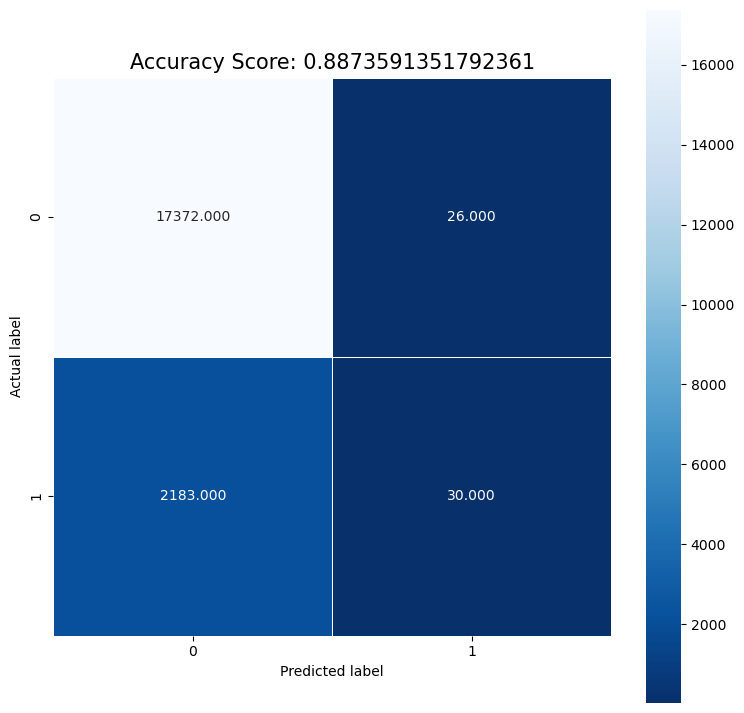

In [789]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Ylog), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logisticreg.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [790]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, Ylog, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.89      1.00      0.94     17398
         YES       0.54      0.01      0.03      2213

    accuracy                           0.89     19611
   macro avg       0.71      0.51      0.48     19611
weighted avg       0.85      0.89      0.84     19611



In [791]:
# Checking the performance of model using ROC curve plots
YScre = logisticreg.decision_function(Xtest)

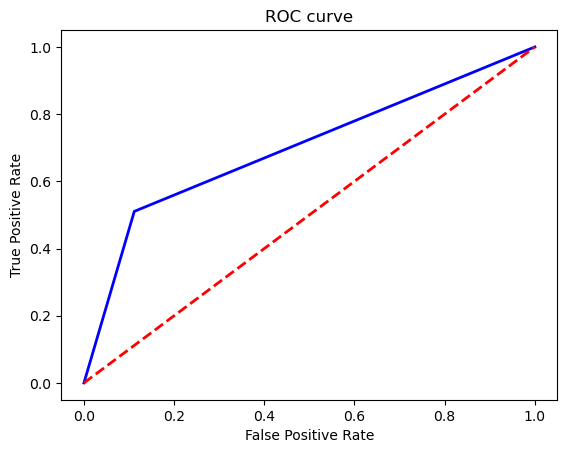

In [792]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve

fpr, tpr,_=roc_curve(logisticreg.predict(Xtrain),Ytrain,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(fpr, tpr, color='blue',
 lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

## Random Forest Classifier

In [793]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42,n_estimators=500)
random_forest.fit(Xtrain, Ytrain)
Yrandforest = random_forest.predict(Xtest)

In [794]:
#Calculating the score,
scorey =random_forest.predict_proba(Xtest)[:,1]
rfpr, rtpr, thresholds = roc_curve(Ytest, scorey)

In [795]:
#Checking the accuracy,

print(" Accuracy of Randomeforest classification: ", random_forest.score(Xtest, Ytest))

 Accuracy of Randomeforest classification:  0.8874101269695579


In [796]:
#Printing the confusion matrix,
print(confusion_matrix(Ytest, Yrandforest))

[[17382    16]
 [ 2192    21]]


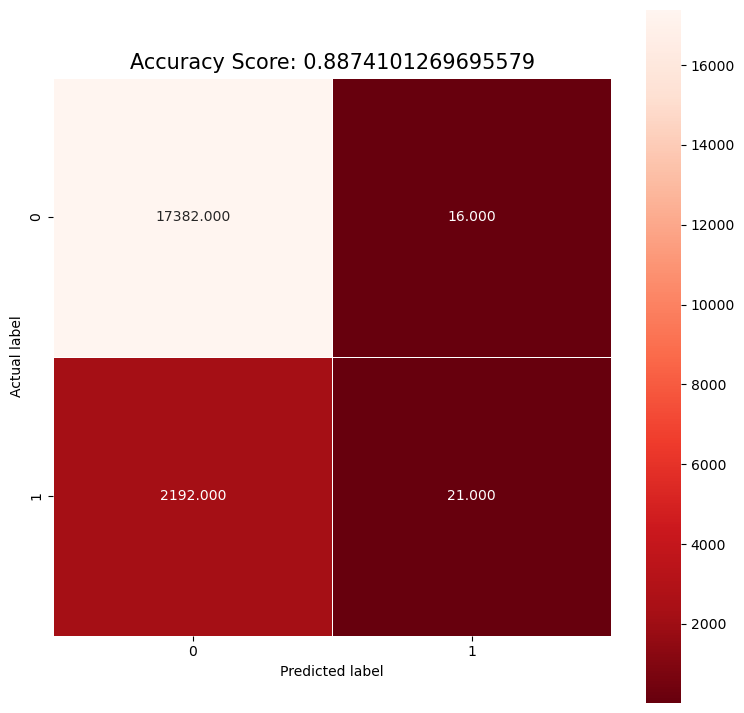

In [797]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Yrandforest), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(random_forest.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [842]:
from sklearn.utils import resample
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,roc_auc_score

In [843]:
n = df.readmitted.value_counts()[0]

# Separate majority and minority classes
df_majority = df[df.readmitted==0]
df_minority = df[df.readmitted==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=n,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
print("The new class count are :")
df_upsampled.readmitted.value_counts()

The new class count are :


0    86986
1    86986
Name: readmitted, dtype: int64

In [844]:
X = df_upsampled.drop(["readmitted"],axis = 1)
y = df_upsampled.readmitted
X_train, X_test, y_train, y_test = train_test_split(X, y)



In [845]:
X_train

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
835,6902646,1411479,1,1,4,6,25,7,2,45,...,0,0,1,1,0,0,0,0,1,1
2535,17264022,3836025,0,1,5,3,1,1,5,54,...,0,0,0,1,0,0,0,0,0,1
23699,83493990,81798021,0,0,3,1,1,7,8,71,...,0,0,3,1,0,0,0,0,1,1
6199,32192580,4415373,1,1,7,3,1,1,7,28,...,0,0,0,1,0,0,0,0,1,1
24269,84751518,38964141,3,1,6,6,1,7,2,43,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32071,106697604,8209809,0,1,6,1,1,6,3,68,...,0,0,1,1,0,0,0,0,0,1
12078,51240258,527112,1,0,7,1,18,7,8,68,...,0,0,0,1,0,0,0,0,1,1
76391,243328512,85141809,1,0,6,2,2,1,1,18,...,0,0,0,1,0,0,0,0,0,0
69634,211153650,41972679,1,0,8,1,1,7,4,57,...,0,0,0,1,0,0,0,0,0,1


In [846]:
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)

# Predicting on the test data
up_scale_pred = lr.predict(X_test)

#Calculating and printing the f1 score 
f1up_scale_pred = f1_score(y_test, up_scale_pred)
print('f1 score for the testing data:\t', f1up_scale_pred)

# Generate the classification report
report = classification_report(y_test, up_scale_pred)

# Print the report
print(report)

acc_up_scale=accuracy_score(y_test, up_scale_pred)
print("Accuracy of thie model:\t\t",acc_up_scale)


f1 score for the testing data:	 0.5642901891993484
              precision    recall  f1-score   support

           0       0.59      0.68      0.63     21822
           1       0.62      0.52      0.56     21671

    accuracy                           0.60     43493
   macro avg       0.60      0.60      0.60     43493
weighted avg       0.60      0.60      0.60     43493

Accuracy of thie model:		 0.6002345204975513


In [848]:
n = df.readmitted.value_counts()[1]

# Separate majority and minority classes

df_majority = df[df.readmitted==0]
df_minority = df[df.readmitted==1]

 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=n,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
print("The new class count are:")
print(df_downsampled.readmitted.value_counts())

The new class count are:
0    11066
1    11066
Name: readmitted, dtype: int64


In [850]:
# Separate input features (X) and target variable (y)
y = df_downsampled.readmitted
X = df_downsampled.drop(['readmitted'], axis=1)
 
# Train model
lr = LogisticRegression().fit(X, y)
 
# Predict on training set
down_scale_pred = lr.predict(X)
 
print("How many class does the model predict?",np.unique( down_scale_pred ))
print("Count in each class:\t\t\t","0 :",len(down_scale_pred[down_scale_pred==0]))
print("\t\t\t\t\t 1 :",len(down_scale_pred[down_scale_pred==1]))

#Calculating and printing the f1 score 
f1down_scale_pred = f1_score(y, down_scale_pred)
print('f1 score for the testing data:\t\t', f1down_scale_pred)

Confx = confusion_matrix(y, down_scale_pred)
      
acc_down_scale=accuracy_score(y, down_scale_pred) 
print("Accuracy of the model:\t\t\t", acc_down_scale)
Confx

How many class does the model predict? [0 1]
Count in each class:			 0 : 12540
					 1 : 9592
f1 score for the testing data:		 0.47148804337302735
Accuracy of the model:			 0.5066871498283029


array([[6344, 4722],
       [6196, 4870]])